Checking line segment [0 0 0] to [-1 -1 -1] against sphere centered at [1 1 1] with radius 1
Discriminant: 12
t1: -1.5773502691896255, t2: -0.42264973081037427
No intersection within the line segment.


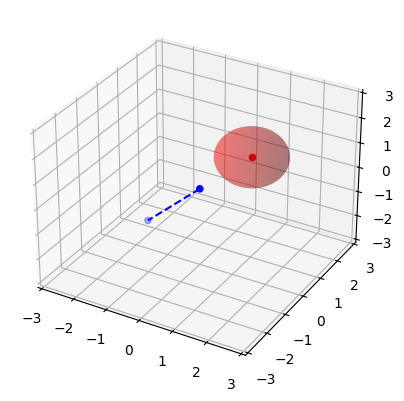

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def line_intersects_sphere(p1, p2, center, radius):
    """
    Check if the line segment from p1 to p2 intersects the sphere with the given center and radius.
    """
    d = p2 - p1
    f = p1 - center
    a = np.dot(d, d)
    b = 2 * np.dot(f, d)
    c = np.dot(f, f) - radius ** 2
    discriminant = b ** 2 - 4 * a * c

    print(f"Checking line segment {p1} to {p2} against sphere centered at {center} with radius {radius}")
    print(f"Discriminant: {discriminant}")

    if discriminant < 0:
        print("No intersection.")
        return False

    discriminant = np.sqrt(discriminant)
    t1 = (-b - discriminant) / (2 * a)
    t2 = (-b + discriminant) / (2 * a)

    print(f"t1: {t1}, t2: {t2}")

    if (0 <= t1 <= 1) or (0 <= t2 <= 1):
        print("Intersection detected.")
        return True

    print("No intersection within the line segment.")
    return False

def plot_line_and_sphere(p1, p2, center, radius):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the sphere
    ax.plot_surface(x, y, z, color='r', alpha=0.3)

    # Plot the line segment
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], 'b--')
    ax.scatter(center[0], center[1], center[2], color='r')
    ax.scatter([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='b')

    # Set plot limits
    ax.set_xlim([min(p1[0], p2[0], center[0]) - radius - 1, max(p1[0], p2[0], center[0]) + radius + 1])
    ax.set_ylim([min(p1[1], p2[1], center[1]) - radius - 1, max(p1[1], p2[1], center[1]) + radius + 1])
    ax.set_zlim([min(p1[2], p2[2], center[2]) - radius - 1, max(p1[2], p2[2], center[2]) + radius + 1])

    plt.show()

# Example points and sphere for debugging
p1 = np.array([0, 0, 0])
p2 = np.array([-1, -1, -1])
center = np.array([1, 1, 1])
radius = 1

# Check intersection
line_intersects_sphere(p1, p2, center, radius)

# Plot the situation
plot_line_and_sphere(p1, p2, center, radius)
